# The baseline model
## Structure

The model looks like this:
![hackathon_model.png](images/hackathon_model.png)

**How do I run this experiment?**

```
# Make sure your PYTHONPATH is set correctly to the root

export PYTHONPATH=/path/to/project:$PYTHONPATH

python3 experiment.py
```

**How do I evaluate the model?**

```
python3 evaluation.py
```


In [7]:
import pandas
import matplotlib.pyplot as plt
import os
root = os.getcwd()

## Training

We trained for 50 epochs and selected the best model according to our validation loss:

In [8]:
training_df = pandas.read_csv(os.path.join(root, "output", "training.log"))
training_df

,epoch,acc,loss,val_acc,val_loss
0,1,0.651545,0.641767,0.650571,0.640912
1,2,0.690397,0.609750,0.639094,0.639563
2,3,0.707954,0.589049,0.634482,0.638316
3,4,0.721774,0.572104,0.631386,0.638327
4,5,0.729556,0.561415,0.631154,0.637187
5,6,0.735556,0.551057,0.628901,0.637907
6,7,0.742983,0.540029,0.627343,0.638688
7,8,0.746899,0.533195,0.625700,0.639852
8,9,0.752083,0.524921,0.622731,0.639936
9,10,0.756192,0.517822,0.622331,0.641064


### Training accuracy

<Figure size 432x288 with 0 Axes>

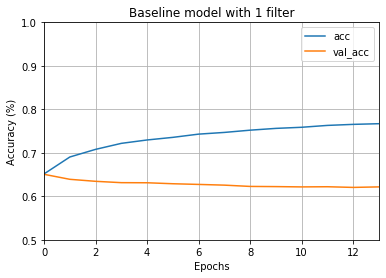

In [9]:
training_acc_columns = [x for x in list(training_df.columns) if "acc" in x]
plt.figure()
training_df[training_acc_columns].plot()
plt.grid(True)
plt.title("Baseline model with 1 filter")
plt.xlabel("Epochs")
plt.ylabel("Accuracy (%)")

plt.ylim([0.5,1.0])

plt.show()

### Training loss

<Figure size 432x288 with 0 Axes>

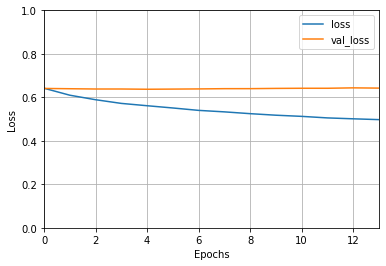

In [10]:
training_loss_columns = [x for x in list(training_df.columns) if "loss" in x]
plt.figure()
training_df[training_loss_columns].plot()
plt.grid(True)
plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.ylim([0.0,1.0])

plt.show()

## Evaluation

In [11]:
with open(os.path.join(root, "output", "eval.json")) as fp:
    df = pandas.read_json(fp).T

Each point in the boxplot is the accuracy for one subject

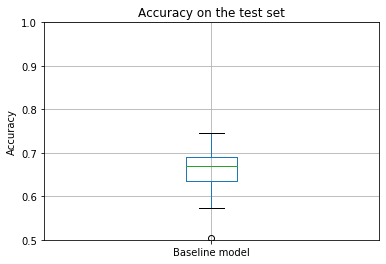

In [12]:
plt.figure()
df[["acc"]].boxplot()
plt.ylim([0.5,1])
plt.ylabel("Accuracy")
plt.title("Accuracy on the test set")
plt.xticks(plt.xticks()[0], ["Baseline model"])
plt.show()